In [40]:
%matplotlib notebook
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as stats
import numpy as np


In [41]:
# data files
Covid19_case_report_2020 = "data/covid-19-all.csv"

# Read the mouse data and the study results
Covid19_case_report_2020 = pd.read_csv(Covid19_case_report_2020)

C:\Users\arron\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [42]:
Covid19_case_report_2020.head()

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
0,NaN,NaN,NaN,NaN,51526.0,41727.0,2191.0,2021-01-01
1,NaN,NaN,NaN,NaN,58316.0,33634.0,1181.0,2021-01-01
2,NaN,NaN,NaN,NaN,99897.0,67395.0,2762.0,2021-01-01
3,NaN,NaN,NaN,NaN,8117.0,7463.0,84.0,2021-01-01
4,NaN,NaN,NaN,NaN,17568.0,11146.0,405.0,2021-01-01


In [43]:
Covid19_case_report_2020 = pd.DataFrame(Covid19_case_report_2020)

In [71]:
AU_Covid19_case_report_2020 = Covid19_case_report_2020.loc[Covid19_case_report_2020['Country/Region']== 'Australia',:]

AU_Covid19_case_report_2020.head()

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
87582,Australia,NaN,-33.8688,144.9631,NaN,NaN,NaN,2020-01-23
95626,Australia,NaN,-33.8688,144.9631,4.0,NaN,NaN,2020-01-25
99651,Australia,NaN,-33.8688,144.9631,4.0,NaN,NaN,2020-01-26
103683,Australia,New South Wales,-33.8688,151.2093,4.0,NaN,NaN,2020-01-27
103684,Australia,Victoria,-37.8136,144.9631,1.0,NaN,NaN,2020-01-27


In [46]:
AU_Covid19_case_report_2020["Province/State"].count()

2593

In [47]:
AU_Covid19_case_report_2020.describe()

,Latitude,Longitude,Confirmed,Recovered,Deaths
count,2596.000000,2596.000000,2595.000000,2583.000000,2581.000000
mean,-31.399390,141.584684,1961.796532,1651.133178,51.509492
std,10.976323,11.562350,4583.395045,4126.401994,171.065091
min,-42.882100,115.860500,0.000000,0.000000,0.000000
25%,-35.473500,138.600700,107.000000,40.000000,2.000000
50%,-33.868800,144.963100,443.000000,420.000000,6.000000
75%,-27.879975,151.209300,1154.500000,1084.000000,13.000000
max,35.443700,153.400000,20376.000000,19538.000000,820.000000


In [48]:
AU_Covid19_case_report_2020.isnull().sum()

Country/Region     0
Province/State     3
Latitude           0
Longitude          0
Confirmed          1
Recovered         13
Deaths            15
Date               0
dtype: int64

In [49]:
#groupby states
States_confirmed = AU_Covid19_case_report_2020.groupby('Province/State')['Confirmed'].sum()
States_confirmed

Province/State
Australian Capital Territory      31112.0
External territories                  0.0
From Diamond Princess                55.0
Jervis Bay Territory                  0.0
New South Wales                 1062230.0
Northern Territory                10118.0
Queensland                       311709.0
South Australia                  132831.0
Tasmania                          61365.0
Victoria                        3295912.0
Western Australia                185522.0
Name: Confirmed, dtype: float64

In [61]:
AU_Covid19_case_report_2020.dtypes
AU_Covid19_case_report_2020['Date']= pd.to_datetime(AU_Covid19_case_report_2020['Date'],format='%Y%m%d', errors='ignore')
#df["Date]=pd.to_datetime(df["Date", format='%Y%m%d', errors='ignore')

<ipython-input-61-a59b25819bdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AU_Covid19_case_report_2020['Date2']= pd.to_datetime(AU_Covid19_case_report_2020['Date'],format='%Y%m%d', errors='ignore')


In [66]:
AU_Covid19_case_report_2020["Date"] = pd.to_datetime(AU_Covid19_case_report_2020["Date"])
AU_Covid19_case_report_2020.head()


<ipython-input-66-24d763088bb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AU_Covid19_case_report_2020["Date"] = pd.to_datetime(AU_Covid19_case_report_2020["Date"])


,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date,Date2
87582,Australia,NaN,-33.8688,144.9631,NaN,NaN,NaN,2020-01-23,2020-01-23
95626,Australia,NaN,-33.8688,144.9631,4.0,NaN,NaN,2020-01-25,2020-01-25
99651,Australia,NaN,-33.8688,144.9631,4.0,NaN,NaN,2020-01-26,2020-01-26
103683,Australia,New South Wales,-33.8688,151.2093,4.0,NaN,NaN,2020-01-27,2020-01-27
103684,Australia,Victoria,-37.8136,144.9631,1.0,NaN,NaN,2020-01-27,2020-01-27


In [67]:
AU_Covid19_case_report_2020.dtypes

Country/Region            object
Province/State            object
Latitude                 float64
Longitude                float64
Confirmed                float64
Recovered                float64
Deaths                   float64
Date              datetime64[ns]
Date2                     object
dtype: object

No handles with labels found to put in legend.


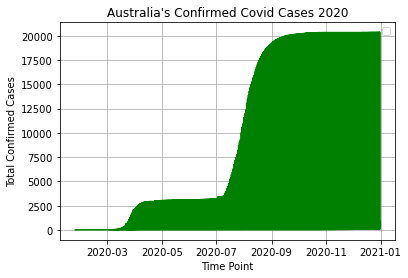

In [70]:
# Generate line plot
plt.plot(AU_Covid19_case_report_2020['Date'],AU_Covid19_case_report_2020["Confirmed"], color="Green")
plt.title("Australia's Confirmed Covid Cases 2020")
plt.xlabel('Time Point')
plt.ylabel('Total Confirmed Cases')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
# Create a legend for our chart
plt.legend()
plt.show()